In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import prim
import seaborn as sns
#from sklearn import mixture
import os
#from clustering_and_prim_tools import *

In [2]:
%matplotlib inline

In [3]:
sns.set_context("poster",rc={"font.size": 28})
sns.set_style("whitegrid")

In [4]:
myfolder = "C:/Users/WB451855/OneDrive - WBG/!infra_needs_data/energy_iiasa_output_data/"

In [20]:
fig11data = pd.read_csv(myfolder+"figure3-11.csv")

In [21]:
fig11data = fig11data.set_index(['year','climate'])
fig11data.columns.name='model'

In [22]:
fig11data

model          AIM/CGE     IMAGE  MESSAGEix-GLOBIOM     POLES  REMIND-MAgPIE  \
year climate                                                                   
2015 BAU      0.578407  0.740770           0.589730  0.504905       0.698690   
     NDC      0.578407  0.740770           0.589730  0.504905       0.698690   
     2C       0.578407  0.740770           0.589730  0.504905       0.698690   
2020 BAU      0.532661  0.524803           0.600514  0.737384       0.734685   
     NDC      0.546837  0.640560           0.600514  0.742044       0.734685   
     2C       0.563236  0.896439           0.600514  0.737077       0.734685   
2025 BAU      0.665630  0.538554           0.597566  0.611871       0.690066   
     NDC      0.716470  0.610086           0.665288  0.668589       0.777778   
     2C       0.923702  0.968822           0.736690  0.815391       0.925064   
2030 BAU      0.652700  0.537356           0.593087  0.568387       0.702452   
     NDC      0.753021  0.616951           0.742391  0.815016       0.814627   
     2C       0.980373  0.978668           0.831677  0.923146       0.979537   

model         WITCH-GLOBIOM  
year climate                 
2015 BAU           0.700498  
     NDC           0.700498  
     2C            0.700498  
2020 BAU           0.432757  
     NDC           0.724653  
     2C            0.969544  
2025 BAU           0.428539  
     NDC           0.739667  
     2C            0.973296  
2030 BAU           0.441427  
     NDC           0.562135  
     2C            0.980335

In [23]:
fig11data.stack('model').reset_index().rename(columns={0:"share"})

,year,climate,model,share
0,2015,BAU,AIM/CGE,0.578407
1,2015,BAU,IMAGE,0.740770
2,2015,BAU,MESSAGEix-GLOBIOM,0.589730
3,2015,BAU,POLES,0.504905
4,2015,BAU,REMIND-MAgPIE,0.698690
5,2015,BAU,WITCH-GLOBIOM,0.700498
6,2015,NDC,AIM/CGE,0.578407
7,2015,NDC,IMAGE,0.740770
8,2015,NDC,MESSAGEix-GLOBIOM,0.589730
9,2015,NDC,POLES,0.504905


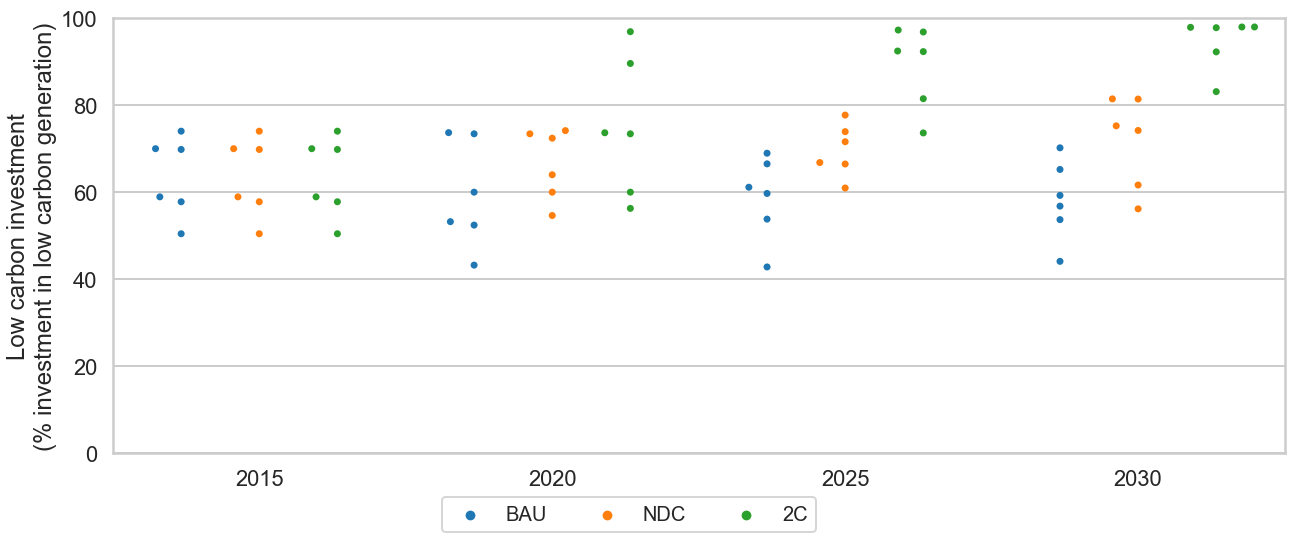

In [82]:
toplot = fig11data.stack('model').reset_index().rename(columns={0:"share"})

toplot['share'] = 100*toplot.share

ax = sns.swarmplot(x='year',y='share', data=toplot,hue='climate',dodge=True,size=7)

ax.set_xlabel("")
ax.set_ylabel("Low carbon investment\n(% investment in low carbon generation)")

ax.figure.set_size_inches(21, 8)

#g = sns.swarmplot(x='year',y='share', data=toplot,hue='climate',kind = "swarm",dodge=True, height=9, aspect=1.5,\
 #                 legend=False, size=6)

#g.set_axis_labels("", "Low carbon investment\n(% investment in low carbon generation)")
ax.legend(title="",fontsize = 20, bbox_to_anchor=(0.6, -0.1), borderaxespad=0.,ncol=3)

ax.set_ylim(0,100)

plt.savefig("C:\\Users\\WB451855\\OneDrive - WBG\\infrastructure needs\\infra_needs_writing_process\\graphs\\Chapter 3\\fig3_11_new.pdf")
plt.savefig("C:\\Users\\WB451855\\OneDrive - WBG\\infrastructure needs\\infra_needs_writing_process\\graphs\\Chapter 3\\fig3_11_new.eps")

In [5]:
data = pd.read_excel(myfolder+"analysis IIASA august.xlsx","discounted",usecols=range(0,9))

In [6]:
data.columns

Index(['Model', 'Region', 'Scenario', 'Variable', 'Unit', 2015, 2020, 2025,
       2030],
      dtype='object')

In [7]:
data.Variable.unique()

array(['CCS', 'Electricity - Fossil Fuels w/o CCS',
       'Electricity - Non-bio Renewables',
       'Electricity - T&D and Storage',
       'Energy Supply|Electricity|Biomass|w/ CCS',
       'Energy Supply|Electricity|Biomass|w/o CCS',
       'Energy Supply|Electricity|Coal|w/ CCS',
       'Energy Supply|Electricity|Coal|w/o CCS',
       'Energy Supply|Electricity|Electricity Storage',
       'Energy Supply|Electricity|Gas|w/ CCS',
       'Energy Supply|Electricity|Gas|w/o CCS',
       'Energy Supply|Electricity|Geothermal',
       'Energy Supply|Electricity|Hydro',
       'Energy Supply|Electricity|Nuclear',
       'Energy Supply|Electricity|Ocean',
       'Energy Supply|Electricity|Oil|w/ CCS',
       'Energy Supply|Electricity|Solar',
       'Energy Supply|Electricity|Transmission and Distribution',
       'Energy Supply|Electricity|Wind', 'Elec_FFwCCS',
       'Elec_nonRen-clean', 'Elec_gen_tot', 'Elec_tot_inv', 'GDP|MER',
       'Population', 'Secondary Energy|Electricity', 'Ele

In [8]:
data.Region.unique()

array(['R5ASIA', 'R5LAM', 'R5MAF', 'R5REF', 'World', 'Developing'],
      dtype=object)

In [10]:
data.loc[data.Variable=="GDP|MER","Unit"].unique()

array(['Billion US$2015/yr'], dtype=object)

In [11]:
data.loc[data.Variable=="Elec_tot_inv","Unit"].unique()

array(['Billion US$2015/yr'], dtype=object)

In [117]:
mydata = data.copy()
mydata = mydata.set_index(['Model', 'Region', 'Scenario', 'Variable']).drop("Unit",axis=1).drop(['World', 'Developing'],level="Region").drop("1.5C",level="Scenario")
mydata.columns.name="year"
mydata = mydata.stack()
mydata.name="value"

In [118]:
mydata = mydata.unstack(['Model', 'Region', 'Scenario', 'Variable']).reindex(range(2015,2031)).interpolate(axis=0).stack(['Model', 'Region', 'Scenario', 'Variable'])

In [164]:
investments = mydata.unstack("Variable")[['Elec_tot_inv','GDP|MER']]

In [165]:
investments["investments_over_gdp"] = investments['Elec_tot_inv']/investments['GDP|MER']

In [166]:
investments = investments.reset_index("year")

In [167]:
d = 0.06
investments["discount_factor"] = (1+d)**(1-(investments.year.astype(int)-2015))

In [168]:
investments = investments.set_index("year",append=True)

In [169]:
investments["investments_discounted"] = investments['Elec_tot_inv']*investments['discount_factor']

In [170]:
urban_share = pd.read_csv(myfolder+"urban_share_ssp2.csv")
urban_share = urban_share.drop(["Model - Scenario","Variable","Unit"],axis=1).set_index("Region")
urban_share.columns.name = "year"
urban_share = urban_share.stack()
urban_share.name = "urban_share"

In [171]:
urban_share = urban_share.reset_index()
urban_share["Region"] = urban_share.Region.str.replace(".","").str.replace("R52","R5")
urban_share["year"] = urban_share.year.astype("int")
urban_share.sample(3)

,Region,year,urban_share
15,R5LAM,2060,89.778
27,R5MAF,2080,70.798
35,R5OECD,2060,88.747


In [172]:
urban_share_interp = urban_share.set_index(["Region","year"]).unstack("Region").reindex(range(2010,2101)).interpolate(axis=0).stack()

In [173]:
investments = investments.reset_index().merge(urban_share_interp.reset_index(),on=["Region","year"],how="left")

In [174]:
investments["investments_urban"] = 1/100*investments['Elec_tot_inv']*investments.urban_share
investments["investments_urban_disc"] = 1/100*investments['investments_discounted']*investments.urban_share

In [175]:
investments = investments[investments.year<2031]

In [176]:
investments = investments.set_index(['Model', 'Region', 'Scenario', 'year'])

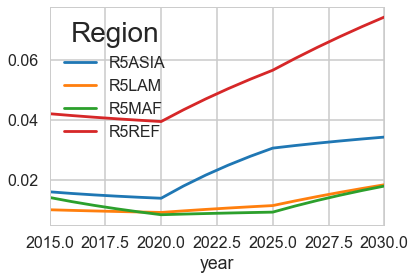

In [177]:
best_scenario = investments.investments_over_gdp.unstack("Scenario")["2C"].unstack("Model")["AIM/CGE"]

best_scenario.unstack("Region").plot()

In [178]:
all_dev_countries = investments.sum(level=["Model", "Scenario","year"]).drop(["investments_over_gdp"],axis=1).copy()

In [179]:
all_dev_countries["investments_over_gdp"] = all_dev_countries['Elec_tot_inv']/all_dev_countries['GDP|MER']
all_dev_countries["investments_over_gdp_urban"] = all_dev_countries['investments_urban']/all_dev_countries['GDP|MER']

In [180]:
1/15*all_dev_countries.investments_discounted.sum(level=["Model", "Scenario"])

Model              Scenario
AIM/CGE            2C          487.147540
                   BAU         296.837209
                   NDC         324.164456
IMAGE              2C          379.638826
                   BAU         423.244419
                   NDC         456.276744
MESSAGEix-GLOBIOM  2C          325.298402
                   BAU         298.659520
                   NDC         304.836756
POLES              2C          503.852684
                   BAU         458.553397
                   NDC         483.852884
REMIND-MAgPIE      2C          759.895756
                   BAU         623.038703
                   NDC         645.230382
WITCH-GLOBIOM      2C          397.358203
                   BAU         423.342544
                   NDC         438.468032
Name: investments_discounted, dtype: float64

In [181]:
1/15*all_dev_countries.investments_urban_disc.sum(level=["Model", "Scenario"])

Model              Scenario
AIM/CGE            2C          263.530758
                   BAU         161.739112
                   NDC         176.999629
IMAGE              2C          192.446908
                   BAU         219.490089
                   NDC         232.040813
MESSAGEix-GLOBIOM  2C          166.018312
                   BAU         152.474703
                   NDC         155.523849
POLES              2C          257.538316
                   BAU         233.934963
                   NDC         246.642627
REMIND-MAgPIE      2C          393.765019
                   BAU         322.003060
                   NDC         333.830973
WITCH-GLOBIOM      2C          213.625524
                   BAU         227.851421
                   NDC         242.780023
Name: investments_urban_disc, dtype: float64

In [182]:
100*all_dev_countries.investments_over_gdp_urban.mean(level=["Model","Scenario"])

Model              Scenario
AIM/CGE            2C          1.175719
                   BAU         0.698169
                   NDC         0.767093
IMAGE              2C          0.641254
                   BAU         0.733182
                   NDC         0.774834
MESSAGEix-GLOBIOM  2C          0.486290
                   BAU         0.446684
                   NDC         0.455542
POLES              2C          1.086173
                   BAU         0.978948
                   NDC         1.036034
REMIND-MAgPIE      2C          1.544251
                   BAU         1.234894
                   NDC         1.285220
WITCH-GLOBIOM      2C          0.880247
                   BAU         0.915925
                   NDC         0.981711
Name: investments_over_gdp_urban, dtype: float64

In [183]:
100*all_dev_countries.investments_over_gdp.mean(level=["Model","Scenario"])

Model              Scenario
AIM/CGE            2C          2.169828
                   BAU         1.279011
                   NDC         1.402218
IMAGE              2C          1.265186
                   BAU         1.413739
                   NDC         1.523479
MESSAGEix-GLOBIOM  2C          0.954170
                   BAU         0.876392
                   NDC         0.894304
POLES              2C          2.117365
                   BAU         1.911780
                   NDC         2.025414
REMIND-MAgPIE      2C          2.971555
                   BAU         2.382810
                   NDC         2.476985
WITCH-GLOBIOM      2C          1.633793
                   BAU         1.698672
                   NDC         1.769644
Name: investments_over_gdp, dtype: float64

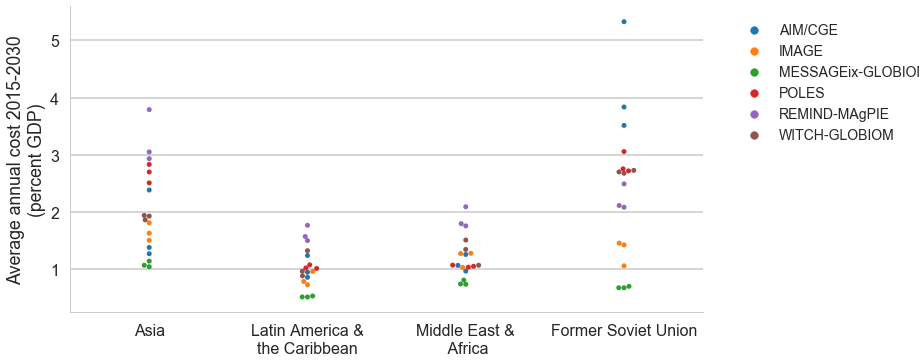

In [100]:
toplot = investments.investments_over_gdp.unstack("year").mean(axis=1).drop("R5OECD90+EU",level="Region")
toplot = toplot.reset_index().rename(columns={0:"investments_over_gdp"})

toplot['investments_over_gdp'] = 100*toplot.investments_over_gdp

toplot["Region"] = toplot.Region.replace({"R5ASIA":"Asia",\
                                         "R5LAM":"Latin America &\nthe Caribbean",\
                                         "R5MAF":"Middle East &\n Africa",\
                                         "R5OECD90+EU":"High income",\
                                         "R5REF":"Former Soviet Union"})

g = sns.factorplot(x='Region',y='investments_over_gdp', data=toplot,hue='Model', kind="swarm",dodge=False, size=6, aspect=1.7,\
                  legend=False)

g.set_axis_labels("", "Average annual cost 2015-2030\n(percent GDP)")
g.add_legend(title="",fontsize = 14, bbox_to_anchor=(1, 0.65), borderaxespad=0.)

In [ ]:
all_dev_countries_urban = all_dev_countries.reset_index().merge(urban_share_interp.reset_index(),on=["Region","year"],how="left")

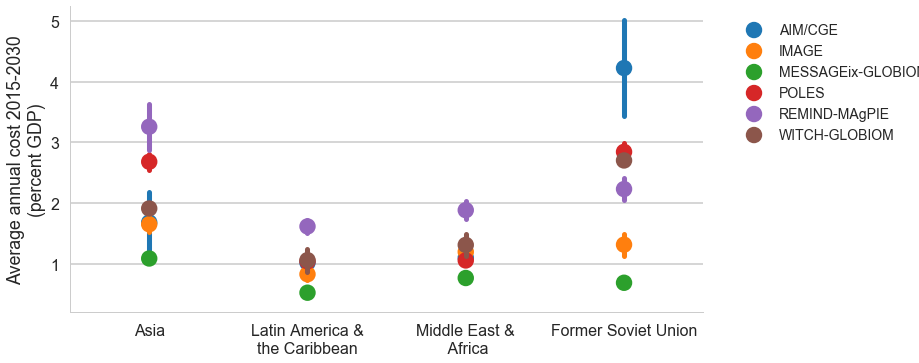

In [101]:
toplot = investments.investments_over_gdp.unstack("year").mean(axis=1).drop("R5OECD90+EU",level="Region")
toplot = toplot.reset_index().rename(columns={0:"investments_over_gdp"})

toplot['investments_over_gdp'] = 100*toplot.investments_over_gdp

toplot["Region"] = toplot.Region.replace({"R5ASIA":"Asia",\
                                         "R5LAM":"Latin America &\nthe Caribbean",\
                                         "R5MAF":"Middle East &\n Africa",\
                                         "R5OECD90+EU":"High income",\
                                         "R5REF":"Former Soviet Union"})

g = sns.factorplot(x='Region',y='investments_over_gdp', data=toplot,hue='Model', kind="point",dodge=False, join=False, size=6, aspect=1.7,ci="sd",\
                  markers="o",legend=False)

g.set_axis_labels("", "Average annual cost 2015-2030\n(percent GDP)")
g.add_legend(title="",fontsize = 14, bbox_to_anchor=(1, 0.65), borderaxespad=0.)

In [108]:
forgraph = toplot
forgraph["Scenario"] = forgraph.Scenario.replace({"2C":"S2C"})
forgraph = forgraph.set_index(['Model', 'Region', 'Scenario']).unstack("Model").sort_index(level=["Region","Scenario"]).reset_index()
forgraph["Scenario"] = forgraph.Scenario.replace({"S2C":"2C"})
forgraph["Region"] = forgraph.Region.str.replace("\n"," ")
forgraph.to_csv(myfolder+"regional_graph.csv")

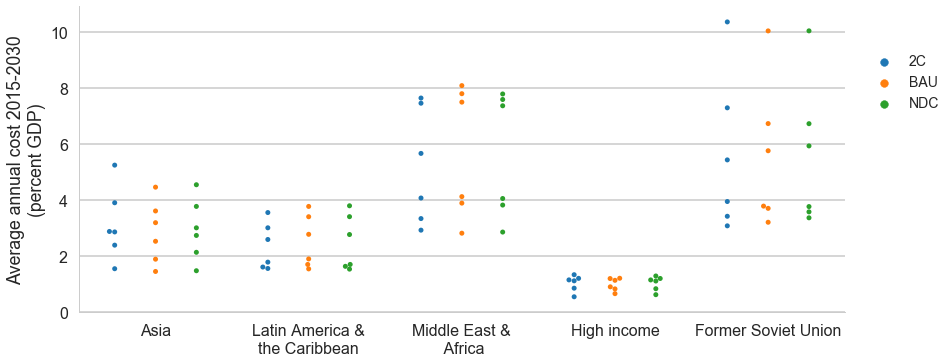

In [62]:
toplot = investments.investments_over_gdp.unstack("year").mean(axis=1)
toplot = toplot.reset_index().rename(columns={0:"investments_over_gdp"})

toplot['investments_over_gdp'] = 100*toplot.investments_over_gdp

toplot["Region"] = toplot.Region.replace({"R5ASIA":"Asia",\
                                         "R5LAM":"Latin America &\nthe Caribbean",\
                                         "R5MAF":"Middle East &\n Africa",\
                                         "R5OECD90+EU":"High income",\
                                         "R5REF":"Former Soviet Union"})

g = sns.factorplot(x='Region',y='investments_over_gdp', data=toplot,hue='Scenario', kind="swarm",dodge=True, size=6, aspect=2,\
                  legend=False)

g.set_axis_labels("", "Average annual cost 2015-2030\n(percent GDP)")
g.add_legend(title="",fontsize = 14, bbox_to_anchor=(1, 0.65), borderaxespad=0.)